In [51]:
%matplotlib inline
import pykat
import pylab as pl
import pandas
import matplotlib.pyplot as plt
import matplotlib
import csv
import math
import numpy as np
from pykat.parallel import parakat
import pprint

pandas.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [52]:
#Perfct Mode-Matching Conditions

katfile = './aLIGO_IFO_AWC_tuning_DCoff_maxtem4.kat'
basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile)

basekat.parseCommands("""
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor

# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1

#sq sqz 0 10 0 nsqz

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans
xaxis darm f log 5 5k 50
yaxis re:im
""")

basekat.undumpNodes() #undump the vacuum nodes
kat=basekat.deepcopy() #copy kat code

trace_out = kat.run(getTraceData=True)

out = kat.run()

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-08-23 17:16:15.797418


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 15.9668 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-23 17:16:31.764679

Finished in 13.5079 seconds


 99% | ETA:  0:00:00 | Calculating                                             

In [53]:
vars(trace_out[1][0]['nAOE1trans'][1])

{'_gauss_param__lambda': 1.064e-06,
 '_gauss_param__nr': 1.0,
 '_gauss_param__q': (0.449490696453873+13.3411754581134j)}

In [54]:
# [access object][trace data]['name']
outdict = trace_out[1][0]

In [55]:
# [access object][trace data]
outdict = trace_out[1][0]

#parse the output to name and q's
dictlist = []
for key, value in outdict.items():
    temp = [key,value]
    dictlist.append(temp)


nodename_list = []
q_x_list = []
q_y_list = []

#[node_list][key/parameters][x/y]
for i in range(len(dictlist)):
    nodename_list.append(dictlist[i][0])
    q_x_list.append(dictlist[i][1][0]._gauss_param__q)
    q_y_list.append(dictlist[i][1][1]._gauss_param__q)

In [56]:
dir(outdict['dump_0'][0])

['Rc',
 '__abs__',
 '__add__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_gauss_param__lambda',
 '_gauss_param__nr',
 '_gauss_param__q',
 'beamsize',
 'conjugate',
 'curvature',
 'gouy',
 'imag',
 'nr',
 'overlap',
 'q',
 'real',
 'reverse',
 'w',
 'w0',
 'wavelength',
 'z',
 'zr']

In [57]:
comp_node_list = []

for key in kat.components:
    node0 = kat.components[key].nodes[0].name
    try:
        node1 = kat.components[key].nodes[1].name
    except:
        continue
    comp_node_list.append([key,node0,node1])
    

In [58]:
dir(kat.components['PR3'])

['Frx',
 'Fry',
 'Fz',
 'Ix',
 'Iy',
 'L',
 'R',
 'Rc',
 'Rcx',
 'Rcy',
 'T',
 '_AbstractMirrorComponent__Frx',
 '_AbstractMirrorComponent__Fry',
 '_AbstractMirrorComponent__Fs0',
 '_AbstractMirrorComponent__Fs1',
 '_AbstractMirrorComponent__Fz',
 '_AbstractMirrorComponent__Ix',
 '_AbstractMirrorComponent__Iy',
 '_AbstractMirrorComponent__L',
 '_AbstractMirrorComponent__R',
 '_AbstractMirrorComponent__Rcx',
 '_AbstractMirrorComponent__Rcy',
 '_AbstractMirrorComponent__T',
 '_AbstractMirrorComponent__mass',
 '_AbstractMirrorComponent__phi',
 '_AbstractMirrorComponent__r_ap',
 '_AbstractMirrorComponent__rx',
 '_AbstractMirrorComponent__rxmech',
 '_AbstractMirrorComponent__ry',
 '_AbstractMirrorComponent__rymech',
 '_AbstractMirrorComponent__xbeta',
 '_AbstractMirrorComponent__ybeta',
 '_AbstractMirrorComponent__z',
 '_AbstractMirrorComponent__zmech',
 '_Component__add_node_setter',
 '_Component__get_node_setter',
 '_Component__id',
 '_Component__name',
 '_Component__on_node_change',
 '_C

In [59]:
kat.nodes.nAOE1in

In [60]:
vars(kat.nodes.nAOE1in.network)

{'_NodeNetwork__componentCallback': {876: <bound method Component.__on_node_change of <pykat.components.pykat.components.laser_1916 object at 0x7fa6180b8550>>,
  877: <bound method Component.__on_node_change of <pykat.components.pykat.components.space_1948 object at 0x7fa618677d68>>,
  878: <bound method Component.__on_node_change of <pykat.components.pykat.components.modulator_1913 object at 0x7fa6186accf8>>,
  879: <bound method Component.__on_node_change of <pykat.components.pykat.components.space_1998 object at 0x7fa611427668>>,
  880: <bound method Component.__on_node_change of <pykat.components.pykat.components.modulator_2000 object at 0x7fa6186a0630>>,
  881: <bound method Component.__on_node_change of <pykat.components.pykat.components.space_1895 object at 0x7fa6186cb7f0>>,
  882: <bound method Component.__on_node_change of <pykat.components.pykat.components.modulator_1954 object at 0x7fa6180a1f98>>,
  883: <bound method Component.__on_node_change of <pykat.components.pykat.com

In [61]:
 comp_node_list.index(['sMC1toMC2', 'nMC1trans', 'nMC2in'])

75

In [62]:
comp_node_list[90][2]

'nIM1refl'

In [63]:
###Lock in the components' node q-parameters with the gauss command

katfile1 = './aLIGO_IFO_AWC_tuning_DCoff_maxtem4.kat'
basekat1 = pykat.finesse.kat()
basekat1.loadKatFile(katfile)
basekat1.parseCommands("""
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor

# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1

#sq sqz 0 10 0 nsqz

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans
xaxis darm f log 5 5k 50
yaxis re:im
""")

for i in range(0,5,1):
    comp = comp_node_list[i][0]
    node1 = comp_node_list[i][1]
    node2 = comp_node_list[i][2]
    qx1 = trace_out[1][0][node1][0]._gauss_param__q
    qy1 = trace_out[1][0][node1][1]._gauss_param__q
    qx2 = trace_out[1][0][node2][0]._gauss_param__q
    qy2 = trace_out[1][0][node2][1]._gauss_param__q
    
    real_qx1 = str(float(np.real(qx1)))
    imag_qx1 = str(float(np.imag(qx1)))
    
    real_qy1 = str(float(np.real(qy1)))
    imag_qy1 = str(float(np.imag(qy1)))
        
    real_qx2 = str(float(np.real(qx2)))
    imag_qx2 = str(float(np.imag(qx2)))
    
    real_qy2 = str(float(np.real(qy2)))
    imag_qy2 = str(float(np.imag(qy2)))
    
    #gauss* name component node q [qy]
    gauss1 = "gauss* " + "gaussina" + str(i) + " " + comp + " " + node1\
    + " " + real_qx1 + " " + imag_qx1 + " " + real_qy1 + " " + imag_qy1
    gauss2 = "gauss* " + "gaussinb" + str(i) + " " + comp + " " + node2\
    + " " + real_qx2 + " " + imag_qx2 + " " + real_qy2 + " " + imag_qy2
    print(gauss1)
    print(gauss2)
    try:
        basekat1.parseCommands(gauss1)
        #basekat1.parseCommands(gauss2)
    except:
        continue

    
#basekat1.parseCommands('startnode n0')

basekat1.undumpNodes() #undump the vacuum nodes

kat1=basekat1.deepcopy() #copy kat code

out_frozenq = kat1.run()

trace_out_frozenq = kat1.run(getTraceData=True)

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.
gauss* gaussina0 ETMYsub nETMYs1 2203.87115214173 301.069230104416 2203.87115214173 301.069230104416
gauss* gaussinb0 ETMYsub nETMYs2 2204.07115214173 301.069230104416 2204.07115214173 301.069230104416
gauss* gaussina1 SRMHR nSRMHRa 4.73320343361546 2.13229898614863 4.92993692424945 1.94056609838815
gauss* gaussinb1 SRMHR nSRMHRb -5.19234236268324 1.61361077504175 -5.30281030037173 1.43991118008301
gauss* gaussina2 OP nOPd -4.07351992797272 1.61361077504175 -4.18398786566121 1.43991118008301
gauss* gaussinb2 OP nOPb -4.07351992797272 1.61361077504175 -4.18398786566121 1.43991118008301
gauss* gaussina3 IMFC nIMFC1 8.0445432085806 8.00861649683913 9.09415227937417 8.35254958804968
gauss* gaussinb3 IMFC nIMFC2 -8.04443929675661 7.99014112676497 -8.98661504852923 7.53200586826001
gauss* gaussina4 lp3 nPR3b -1373.3154024107

 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.7425 seconds
--------------------------------------------------------------
Running kat - Started at 2016-08-23 17:16:59.480380

Finished in 13.6863 seconds


 99% | ETA:  0:00:00 | Calculating                                             

In [64]:
dict_frozenq = trace_out_frozenq[1][0]
print(dict_frozenq, outdict)

{'n6': (<pykat.optics.gaussian_beams.beam_param object at 0x7fa612c9abe0>, <pykat.optics.gaussian_beams.beam_param object at 0x7fa612c9a7f0>), 'dump_31': (<pykat.optics.gaussian_beams.beam_param object at 0x7fa6181bb128>, <pykat.optics.gaussian_beams.beam_param object at 0x7fa6181bb208>), 'nOPe': (<pykat.optics.gaussian_beams.beam_param object at 0x7fa6181bf048>, <pykat.optics.gaussian_beams.beam_param object at 0x7fa6181bf080>), 'dump_36': (<pykat.optics.gaussian_beams.beam_param object at 0x7fa6181bc710>, <pykat.optics.gaussian_beams.beam_param object at 0x7fa6181bc748>), 'nITMXconstL_trans': (<pykat.optics.gaussian_beams.beam_param object at 0x7fa6182b52e8>, <pykat.optics.gaussian_beams.beam_param object at 0x7fa619152f28>), 'dump_6': (<pykat.optics.gaussian_beams.beam_param object at 0x7fa61907bac8>, <pykat.optics.gaussian_beams.beam_param object at 0x7fa6182b5780>), 'nITMXconstL_in': (<pykat.optics.gaussian_beams.beam_param object at 0x7fa6182b5ac8>, <pykat.optics.gaussian_beams.b

In [65]:
# [access object][trace data]
dict_frozenq = trace_out_frozenq[1][0]

#parse the output to name and q's
dictlist_frozenq = []
for key, value in dict_frozenq.items():
    temp = [key,value]
    dictlist_frozenq.append(temp)

nodename_list_fq = []
q_x_list_fq = []
q_y_list_fq = []

#[node_list][key/parameters][x/y]
for i in range(len(dictlist_frozenq)):
    nodename_list_fq.append(dictlist[i][0])
    q_x_list_fq.append(dictlist_frozenq[i][1][0]._gauss_param__q)
    q_y_list_fq.append(dictlist_frozenq[i][1][1]._gauss_param__q)
    
#test to see if the nodes match up
for i in range(len(nodename_list)):
    if nodename_list[i] != nodename_list_fq[i]:
        print('Untrue! Double check nodenames!')
    else:
        continue

compare_listx=[]
for i in range(len(nodename_list_fq)):
    if q_x_list_fq[i] != q_x_list[i]:
        compare_listx.append([nodename_list_fq[i], q_x_list[i], q_x_list_fq[i]])
    else:
        continue

compare_listy=[]
for i in range(len(nodename_list_fq)):
    if q_y_list_fq[i] != q_y_list[i]:
        compare_listy.append([nodename_list_fq[i], q_y_list[i], q_y_list_fq[i]])
    else:
        continue

In [66]:
compare_listy

[['dump_12',
  (0.329035652338272+0.872249454489459j),
  (0.630124963065479+1.07145484398937j)],
 ['nWPa',
  (-4.77401921628768+1.64733998681461j),
  (-4.77401921628768+2.38803509572047j)],
 ['nPTY',
  (1520.43600582519+207.686805959968j),
  (-1520.16007353429+301.069230104415j)],
 ['nETMYs2',
  (2204.07115214173+301.069230104416j),
  (-2203.67115214173+436.439286052368j)],
 ['nWPb',
  (-2.87858568568894+0.993294976553312j),
  (-2.87858568568894+1.43991118008301j)],
 ['dump_19',
  (1.0467691929798+0.792727194492012j),
  (0.798115999843369+0.678101158720466j)],
 ['nOMC_ARIC2_in',
  (-0.315769192979805+0.792727194492012j),
  (-0.0671159998433687+0.678101158720466j)],
 ['dump_22',
  (-0.219769192979805+0.792727194492012j),
  (0.0288840001566313+0.678101158720466j)],
 ['nOMC_ARIC_trans',
  (-0.318584232759841+1.14916190763965j),
  (0.0418711417381467+0.982996453940525j)],
 ['nOM1b',
  (-0.329035652338272+0.872249454489459j),
  (-0.630124963065479+1.07145484398937j)],
 ['nOMC_ARIC_in',
  (-

In [67]:
for i in range(len(nodename_list)):
    if nodename_list[i] != nodename_list_fq[i]:
        print('Untrue! Double check nodenames!')
    else:
        continue

/home/thomasvo/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


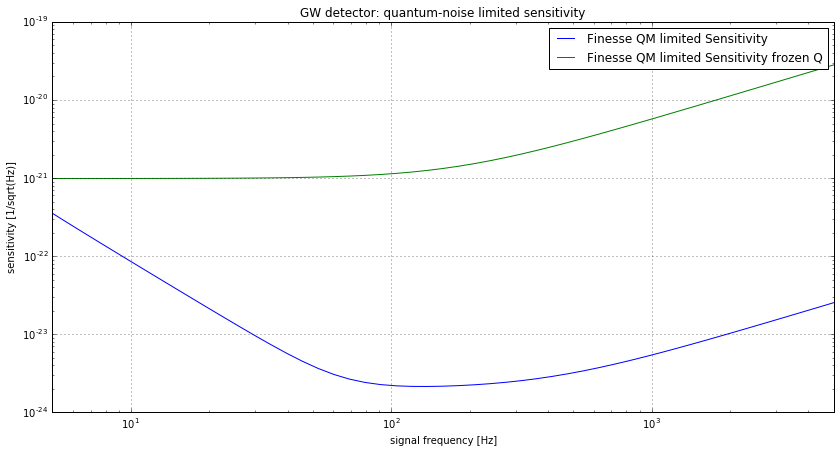

In [68]:
plt.figure(figsize=(14,7))



plt.loglog(out.x,out['NSR_with_RP'], label='Finesse QM limited Sensitivity')
plt.loglog(out.x,out_frozenq['NSR_with_RP'], label='Finesse QM limited Sensitivity frozen Q')

plt.title('GW detector: quantum-noise limited sensitivity')
plt.xlabel('signal frequency [Hz]')
plt.xlim([min(out.x),max(out.x)])

plt.legend()
plt.ylabel('sensitivity [1/sqrt(Hz)]')
plt.grid(True)